In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls /content/drive/MyDrive/

 CNN_LSTM_val_def.ipynb                         embeddings_matrix_validation.npy
'Colab Notebooks'/                              sentiment140_vader4_sinlematizar.csv
 embeddings_matrix_vader_sinlematizar_def.npy


In [ ]:
import pandas as pd

df= pd.read_csv('/content/drive/MyDrive/sentiment140_vader4_sinlematizar.csv')
df

,polarity,id,date,query,user,text,vader_polarity,preprocesado,word_count,preprocesado_constopwords,label,preprocesado_sinlematizar
0,negative,2184288131,Mon Jun 15 15:41:28 PDT 2009,NO_QUERY,Zelus,I want my e-mail with my tracking info for my ...,0.0772,want email track info new iphone,12,i want my email with my track info for my new ...,0,i want my email with my tracking info for my n...
1,negative,1834602716,Mon May 18 03:33:33 PDT 2009,NO_QUERY,S810uk,Is not happy with the weather I'm off to the ...,-0.4585,happy weather im museum later boy sock culture...,27,is not happy with the weather im off to the mu...,0,is not happy with the weather im off to the mu...
2,positive,1976167179,Sat May 30 16:44:04 PDT 2009,NO_QUERY,MicheleBlueston,@cindyscottday and forgot...you got kiddies ho...,0.5106,forgotyou get kiddy home still free agent take...,16,and forgotyou get kiddy home still free agent ...,1,and forgotyou got kiddies home still free agen...
3,positive,2047727017,Fri Jun 05 14:05:11 PDT 2009,NO_QUERY,adrian_x,@iota @brandie will ALWAYS be number two in MY...,0.0772,always number two book,8,will always be number two in m book,1,will always be number two in m book
4,positive,2014391411,Wed Jun 03 01:22:32 PDT 2009,NO_QUERY,muchloveanna,"@cjmccoll no problem gosh, her work is amazing!",0.7469,problem josh work amaze,7,no problem josh her work be amaze,1,no problem josh her work is amazing
...,...,...,...,...,...,...,...,...,...,...,...,...
121099,negative,2175983387,Mon Jun 15 02:34:22 PDT 2009,NO_QUERY,zapakitul,Back from school! Two more weeks of school he...,-0.6467,back school two week school hate highschool,13,back from school two more week of school here ...,0,back from school two more weeks of school here...
121100,positive,2185123417,Mon Jun 15 16:55:17 PDT 2009,NO_QUERY,dreacham,@lauren_nichelle i'll be sure to let daddy kno...,0.7639,ill sure let daddy know hell really happy,11,ill be sure to let daddy know hell be really h...,1,ill be sure to let daddy know hell be really h...
121101,positive,1834315088,Mon May 18 02:27:47 PDT 2009,NO_QUERY,Cherry_Gryffon,@erniehalter YAYYY new country invasion XD *do...,0.6739,yyy new country invasion xd wi helmet,8,yyy new country invasion xd don wi helmet,1,yyy new country invasion xd dons wi helmet
121102,positive,1676509898,Fri May 01 22:15:41 PDT 2009,NO_QUERY,tessthetraveler,just came back from op shopping in wynnum ther...,0.6184,come back op shopping wynnum many 2nd hand sto...,24,just come back from op shopping in wynnum ther...,1,just came back from op shopping in wynnum ther...


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X = df['preprocesado_sinlematizar']
y = df['label']

# Primero dividimos en entrenamiento (80%) y prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=34, stratify=y)

# Luego dividimos el conjunto temporal en entrenamiento (80% de 80%) y validación (20% de 80%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=34, stratify=y_temp)


In [ ]:
import numpy as np
embedding_matrix_x_train= np.load('/content/drive/MyDrive/embeddings_matrix_validation.npy')

In [ ]:
import numpy as np
import random
import tensorflow as tf

seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Configuración de Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.astype(str))
sequences = tokenizer.texts_to_sequences(X_train.astype(str))

max_length = 25
X_train_def = pad_sequences(sequences, maxlen=max_length, padding='post')


embedding_dim = 400
word_index = tokenizer.word_index
num_words = len(word_index) + 1

In [ ]:
# Convertir los textos a secuencias numéricas
sequences = tokenizer.texts_to_sequences(X_test)

# Definir el max_length basado en el percentil deseado (por ejemplo, 25 palabras)
max_length = 25

# Aplicar padding con la longitud máxima definida
X_test_def = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Convertir X_val a secuencias numéricas
sequences_val = tokenizer.texts_to_sequences(X_val.astype(str))  # Convertir a secuencias
X_val_def = pad_sequences(sequences_val, maxlen=max_length, padding='post')  # Asegurar la longitud adecuada


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))


model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7767 - loss: 0.4507 - val_accuracy: 0.8412 - val_loss: 0.3535
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.8528 - loss: 0.3296 - val_accuracy: 0.8504 - val_loss: 0.3495
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.8756 - loss: 0.2850 - val_accuracy: 0.8494 - val_loss: 0.3860
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8971 - loss: 0.2443 - val_accuracy: 0.8470 - val_loss: 0.4627
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.9135 - loss: 0.2103 - val_accuracy: 0.8432 - val_loss: 0.5313


In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8502 - loss: 0.3433
Pérdida en el conjunto de test: 0.3460288643836975
Precisión en el conjunto de test: 0.850831925868988


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7425 - loss: 0.5038 - val_accuracy: 0.8290 - val_loss: 0.3731
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8185 - loss: 0.3897 - val_accuracy: 0.8376 - val_loss: 0.3563
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8305 - loss: 0.3671 - val_accuracy: 0.8426 - val_loss: 0.3508
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8401 - loss: 0.3554 - val_accuracy: 0.8470 - val_loss: 0.3367
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8447 - loss: 0.3450 - val_accuracy: 0.8488 - val_loss: 0.3373
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8478 - loss: 0.3391 - val_accuracy: 0.8506 - val_loss: 0.3300
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8534 - loss: 0.3306 - val_accuracy: 0.8506 - val_loss: 0.3286
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8529 - loss: 0

In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8567 - loss: 0.3195
Pérdida en el conjunto de test: 0.32160672545433044
Precisión en el conjunto de test: 0.8557037115097046


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(64))

model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7450 - loss: 0.4951 - val_accuracy: 0.8364 - val_loss: 0.3620
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8337 - loss: 0.3656 - val_accuracy: 0.8455 - val_loss: 0.3472
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8507 - loss: 0.3337 - val_accuracy: 0.8522 - val_loss: 0.3356
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8618 - loss: 0.3122 - val_accuracy: 0.8530 - val_loss: 0.3326
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8699 - loss: 0.2955 - val_accuracy: 0.8551 - val_loss: 0.3324
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8781 - loss: 0.2823 - val_accuracy: 0.8520 - val_loss: 0.3420
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8833 - loss: 0.2719 - val_accuracy: 0.8523 - val_loss: 0.3524
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8900 - loss: 0

In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8529 - loss: 0.3343
Pérdida en el conjunto de test: 0.33303093910217285
Precisión en el conjunto de test: 0.8540109992027283


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(64))


model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7522 - loss: 0.4953 - val_accuracy: 0.8375 - val_loss: 0.3614
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8337 - loss: 0.3667 - val_accuracy: 0.8455 - val_loss: 0.3446
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8525 - loss: 0.3339 - val_accuracy: 0.8493 - val_loss: 0.3361
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8607 - loss: 0.3134 - val_accuracy: 0.8533 - val_loss: 0.3379
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8693 - loss: 0.2970 - val_accuracy: 0.8547 - val_loss: 0.3481
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8776 - loss: 0.2824 - val_accuracy: 0.8547 - val_loss: 0.3435
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8831 - loss: 0.2706 - val_accuracy: 0.8548 - val_loss: 0.3485
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8880 - loss: 0

In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8518 - loss: 0.3473
Pérdida en el conjunto de test: 0.34950536489486694
Precisión en el conjunto de test: 0.8537632822990417


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)


model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7380 - loss: 0.5056 - val_accuracy: 0.8312 - val_loss: 0.3712
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8230 - loss: 0.3871 - val_accuracy: 0.8438 - val_loss: 0.3526
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8373 - loss: 0.3572 - val_accuracy: 0.8435 - val_loss: 0.3558
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8430 - loss: 0.3439 - val_accuracy: 0.8467 - val_loss: 0.3473
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8500 - loss: 0.3327 - val_accuracy: 0.8501 - val_loss: 0.3453
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8563 - loss: 0.3200 - val_accuracy: 0.8506 - val_loss: 0.3414
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8600 - loss: 0.3154 - val_accuracy: 0.8524 - val_loss: 0.3438
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8625 - loss: 0

In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8541 - loss: 0.3583
Pérdida en el conjunto de test: 0.36112505197525024
Precisión en el conjunto de test: 0.8547541499137878


In [ ]:
#HACER
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))


model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7507 - loss: 0.4893 - val_accuracy: 0.8283 - val_loss: 0.3763
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8268 - loss: 0.3769 - val_accuracy: 0.8419 - val_loss: 0.3513
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8406 - loss: 0.3505 - val_accuracy: 0.8467 - val_loss: 0.3473
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8489 - loss: 0.3351 - val_accuracy: 0.8512 - val_loss: 0.3336
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8564 - loss: 0.3232 - val_accuracy: 0.8537 - val_loss: 0.3293
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8621 - loss: 0.3140 - val_accuracy: 0.8558 - val_loss: 0.3244
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8654 - loss: 0.3054 - val_accuracy: 0.8565 - val_loss: 0.3254
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8666 - loss: 0

In [ ]:
# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8561 - loss: 0.3293
Pérdida en el conjunto de test: 0.32880064845085144
Precisión en el conjunto de test: 0.8566945791244507


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(128))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7502 - loss: 0.4918 - val_accuracy: 0.8340 - val_loss: 0.3700
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8249 - loss: 0.3796 - val_accuracy: 0.8454 - val_loss: 0.3502
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8396 - loss: 0.3527 - val_accuracy: 0.8514 - val_loss: 0.3340
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8468 - loss: 0.3390 - val_accuracy: 0.8526 - val_loss: 0.3258
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8517 - loss: 0.3290 - val_accuracy: 0.8542 - val_loss: 0.3296
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8588 - loss: 0.3169 - val_accuracy: 0.8547 - val_loss: 0.3278
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8633 - loss: 0.3111 - val_accuracy: 0.8557 - val_loss: 0.3317
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8665 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8558 - loss: 0.3261
Pérdida en el conjunto de test: 0.32740136981010437
Precisión en el conjunto de test: 0.8570249080657959


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7475 - loss: 0.4955 - val_accuracy: 0.8335 - val_loss: 0.3671
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8262 - loss: 0.3791 - val_accuracy: 0.8405 - val_loss: 0.3542
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.8388 - loss: 0.3520 - val_accuracy: 0.8501 - val_loss: 0.3353
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 33s 8ms/step - accuracy: 0.8485 - loss: 0.3386 - val_accuracy: 0.8520 - val_loss: 0.3293
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8540 - loss: 0.3264 - val_accuracy: 0.8567 - val_loss: 0.3355
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8586 - loss: 0.3179 - val_accuracy: 0.8566 - val_loss: 0.3250
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8620 - loss: 0.3120 - val_accuracy: 0.8564 - val_loss: 0.3251
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8659 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8558 - loss: 0.3316
Pérdida en el conjunto de test: 0.3360540270805359
Precisión en el conjunto de test: 0.8553734421730042


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7486 - loss: 0.4925 - val_accuracy: 0.8319 - val_loss: 0.3782
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8259 - loss: 0.3804 - val_accuracy: 0.8423 - val_loss: 0.3519
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8381 - loss: 0.3507 - val_accuracy: 0.8503 - val_loss: 0.3411
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8495 - loss: 0.3353 - val_accuracy: 0.8535 - val_loss: 0.3285
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8540 - loss: 0.3280 - val_accuracy: 0.8545 - val_loss: 0.3312
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8590 - loss: 0.3180 - val_accuracy: 0.8545 - val_loss: 0.3327
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8602 - loss: 0.3126 - val_accuracy: 0.8561 - val_loss: 0.3265
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8678 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8573 - loss: 0.3244
Pérdida en el conjunto de test: 0.32492244243621826
Precisión en el conjunto de test: 0.8578506112098694


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 65s 7ms/step - accuracy: 0.7559 - loss: 0.4795 - val_accuracy: 0.8384 - val_loss: 0.3632
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8344 - loss: 0.3654 - val_accuracy: 0.8500 - val_loss: 0.3434
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8493 - loss: 0.3343 - val_accuracy: 0.8532 - val_loss: 0.3326
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8600 - loss: 0.3163 - val_accuracy: 0.8579 - val_loss: 0.3247
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8636 - loss: 0.3030 - val_accuracy: 0.8569 - val_loss: 0.3331
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8732 - loss: 0.2897 - val_accuracy: 0.8553 - val_loss: 0.3378
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8798 - loss: 0.2796 - val_accuracy: 0.8570 - val_loss: 0.3248


In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3270
Pérdida en el conjunto de test: 0.3288799524307251
Precisión en el conjunto de test: 0.8530201315879822


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(128))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7372 - loss: 0.5041 - val_accuracy: 0.8320 - val_loss: 0.3739
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 37s 7ms/step - accuracy: 0.8191 - loss: 0.3888 - val_accuracy: 0.8392 - val_loss: 0.3544
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8331 - loss: 0.3673 - val_accuracy: 0.8451 - val_loss: 0.3459
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8425 - loss: 0.3510 - val_accuracy: 0.8502 - val_loss: 0.3328
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8448 - loss: 0.3433 - val_accuracy: 0.8525 - val_loss: 0.3300
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8492 - loss: 0.3373 - val_accuracy: 0.8552 - val_loss: 0.3253
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8524 - loss: 0.3301 - val_accuracy: 0.8556 - val_loss: 0.3237
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8547 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3237
Pérdida en el conjunto de test: 0.3256886899471283
Precisión en el conjunto de test: 0.8557863235473633


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7539 - loss: 0.4834 - val_accuracy: 0.8359 - val_loss: 0.3636
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8292 - loss: 0.3713 - val_accuracy: 0.8472 - val_loss: 0.3463
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8476 - loss: 0.3395 - val_accuracy: 0.8521 - val_loss: 0.3360
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8558 - loss: 0.3220 - val_accuracy: 0.8553 - val_loss: 0.3273
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8625 - loss: 0.3102 - val_accuracy: 0.8553 - val_loss: 0.3301
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8703 - loss: 0.2964 - val_accuracy: 0.8583 - val_loss: 0.3371
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8756 - loss: 0.2853 - val_accuracy: 0.8597 - val_loss: 0.3373
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8782 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8583 - loss: 0.3379
Pérdida en el conjunto de test: 0.3403245210647583
Precisión en el conjunto de test: 0.8606168031692505


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7381 - loss: 0.5038 - val_accuracy: 0.8376 - val_loss: 0.3667
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8285 - loss: 0.3764 - val_accuracy: 0.8440 - val_loss: 0.3529
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8443 - loss: 0.3443 - val_accuracy: 0.8477 - val_loss: 0.3480
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8523 - loss: 0.3286 - val_accuracy: 0.8508 - val_loss: 0.3506
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8601 - loss: 0.3128 - val_accuracy: 0.8505 - val_loss: 0.3509
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8679 - loss: 0.2975 - val_accuracy: 0.8521 - val_loss: 0.3443
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8742 - loss: 0.2858 - val_accuracy: 0.8500 - val_loss: 0.3616
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 40s 8ms/step - accuracy: 0.8779 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8562 - loss: 0.3506
Pérdida en el conjunto de test: 0.35193905234336853
Precisión en el conjunto de test: 0.8557037115097046


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(LSTM(64))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7379 - loss: 0.4985 - val_accuracy: 0.8283 - val_loss: 0.3745
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8236 - loss: 0.3805 - val_accuracy: 0.8373 - val_loss: 0.3618
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.8413 - loss: 0.3516 - val_accuracy: 0.8493 - val_loss: 0.3405
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.8486 - loss: 0.3358 - val_accuracy: 0.8532 - val_loss: 0.3308
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8575 - loss: 0.3208 - val_accuracy: 0.8559 - val_loss: 0.3423
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8646 - loss: 0.3076 - val_accuracy: 0.8595 - val_loss: 0.3309
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8704 - loss: 0.2978 - val_accuracy: 0.8622 - val_loss: 0.3214
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8748 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8570 - loss: 0.3240
Pérdida en el conjunto de test: 0.3242965340614319
Precisión en el conjunto de test: 0.8592130541801453


In [ ]:
model.save('LSTM01102024.keras')
model.save('LSTM01102024.h5')

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(128))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7544 - loss: 0.4798 - val_accuracy: 0.8362 - val_loss: 0.3610
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8287 - loss: 0.3710 - val_accuracy: 0.8475 - val_loss: 0.3485
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8467 - loss: 0.3399 - val_accuracy: 0.8522 - val_loss: 0.3378
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8541 - loss: 0.3264 - val_accuracy: 0.8576 - val_loss: 0.3259
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8609 - loss: 0.3100 - val_accuracy: 0.8596 - val_loss: 0.3228
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8695 - loss: 0.2982 - val_accuracy: 0.8582 - val_loss: 0.3287
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8743 - loss: 0.2858 - val_accuracy: 0.8579 - val_loss: 0.3299
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8777 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8576 - loss: 0.3257
Pérdida en el conjunto de test: 0.32688793540000916
Precisión en el conjunto de test: 0.8596672415733337


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7549 - loss: 0.4800 - val_accuracy: 0.8393 - val_loss: 0.3602
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.8303 - loss: 0.3694 - val_accuracy: 0.8498 - val_loss: 0.3406
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8456 - loss: 0.3379 - val_accuracy: 0.8517 - val_loss: 0.3296
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8543 - loss: 0.3234 - val_accuracy: 0.8563 - val_loss: 0.3343
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8635 - loss: 0.3098 - val_accuracy: 0.8566 - val_loss: 0.3265
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8693 - loss: 0.2961 - val_accuracy: 0.8546 - val_loss: 0.3339
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8752 - loss: 0.2844 - val_accuracy: 0.8587 - val_loss: 0.3333
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.8799 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.3520
Pérdida en el conjunto de test: 0.3545397222042084
Precisión en el conjunto de test: 0.8618966937065125


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7627 - loss: 0.4728 - val_accuracy: 0.8364 - val_loss: 0.3650
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8371 - loss: 0.3578 - val_accuracy: 0.8503 - val_loss: 0.3424
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8582 - loss: 0.3205 - val_accuracy: 0.8563 - val_loss: 0.3407
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8677 - loss: 0.3001 - val_accuracy: 0.8590 - val_loss: 0.3426
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8777 - loss: 0.2808 - val_accuracy: 0.8597 - val_loss: 0.3436
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8873 - loss: 0.2629 - val_accuracy: 0.8584 - val_loss: 0.3499
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8922 - loss: 0.2480 - val_accuracy: 0.8560 - val_loss: 0.3554
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8989 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 0.3474
Pérdida en el conjunto de test: 0.34889844059944153
Precisión en el conjunto de test: 0.8568597435951233


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7421 - loss: 0.4969 - val_accuracy: 0.8318 - val_loss: 0.3693
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.8258 - loss: 0.3785 - val_accuracy: 0.8451 - val_loss: 0.3528
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 45s 12ms/step - accuracy: 0.8419 - loss: 0.3495 - val_accuracy: 0.8508 - val_loss: 0.3419
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8481 - loss: 0.3372 - val_accuracy: 0.8520 - val_loss: 0.3420
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8576 - loss: 0.3216 - val_accuracy: 0.8562 - val_loss: 0.3294
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8621 - loss: 0.3128 - val_accuracy: 0.8551 - val_loss: 0.3350
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8668 - loss: 0.3026 - val_accuracy: 0.8543 - val_loss: 0.3337
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8698 - loss

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.3272
Pérdida en el conjunto de test: 0.332333505153656
Precisión en el conjunto de test: 0.8537632822990417


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7352 - loss: 0.5066 - val_accuracy: 0.8314 - val_loss: 0.3775
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8193 - loss: 0.3893 - val_accuracy: 0.8433 - val_loss: 0.3533
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8351 - loss: 0.3634 - val_accuracy: 0.8470 - val_loss: 0.3460
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8408 - loss: 0.3517 - val_accuracy: 0.8496 - val_loss: 0.3375
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8480 - loss: 0.3388 - val_accuracy: 0.8495 - val_loss: 0.3392
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8510 - loss: 0.3311 - val_accuracy: 0.8514 - val_loss: 0.3410
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8535 - loss: 0.3242 - val_accuracy: 0.8537 - val_loss: 0.3322
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8609 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8546 - loss: 0.3306
Pérdida en el conjunto de test: 0.3329591453075409
Precisión en el conjunto de test: 0.8565707206726074


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7348 - loss: 0.5045 - val_accuracy: 0.8307 - val_loss: 0.3755
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8229 - loss: 0.3869 - val_accuracy: 0.8430 - val_loss: 0.3563
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8356 - loss: 0.3617 - val_accuracy: 0.8484 - val_loss: 0.3395
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8427 - loss: 0.3478 - val_accuracy: 0.8494 - val_loss: 0.3343
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8498 - loss: 0.3364 - val_accuracy: 0.8527 - val_loss: 0.3307
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8541 - loss: 0.3266 - val_accuracy: 0.8544 - val_loss: 0.3291
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8580 - loss: 0.3202 - val_accuracy: 0.8548 - val_loss: 0.3270
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8620 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8563 - loss: 0.3239
Pérdida en el conjunto de test: 0.3272278904914856
Precisión en el conjunto de test: 0.8554559946060181


In [ ]:
#hacer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 45s 13ms/step - accuracy: 0.7348 - loss: 0.5045 - val_accuracy: 0.8307 - val_loss: 0.3755
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8229 - loss: 0.3869 - val_accuracy: 0.8430 - val_loss: 0.3563
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8356 - loss: 0.3617 - val_accuracy: 0.8484 - val_loss: 0.3395
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8427 - loss: 0.3478 - val_accuracy: 0.8494 - val_loss: 0.3343
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8498 - loss: 0.3364 - val_accuracy: 0.8527 - val_loss: 0.3307
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8541 - loss: 0.3266 - val_accuracy: 0.8544 - val_loss: 0.3291
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8580 - loss: 0.3202 - val_accuracy: 0.8548 - val_loss: 0.3270
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8620 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8563 - loss: 0.3239
Pérdida en el conjunto de test: 0.3272278904914856
Precisión en el conjunto de test: 0.8554559946060181


In [ ]:
#hacer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7353 - loss: 0.5063 - val_accuracy: 0.8316 - val_loss: 0.3773
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8205 - loss: 0.3892 - val_accuracy: 0.8428 - val_loss: 0.3594
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8348 - loss: 0.3647 - val_accuracy: 0.8469 - val_loss: 0.3444
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8417 - loss: 0.3524 - val_accuracy: 0.8494 - val_loss: 0.3369
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 0.8493 - loss: 0.3389 - val_accuracy: 0.8496 - val_loss: 0.3376
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.8535 - loss: 0.3302 - val_accuracy: 0.8511 - val_loss: 0.3336
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8572 - loss: 0.3247 - val_accuracy: 0.8518 - val_loss: 0.3311
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8605 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3275
Pérdida en el conjunto de test: 0.33011582493782043
Precisión en el conjunto de test: 0.854960560798645


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256, return_sequences=True))
model.add(LSTM(256))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7515 - loss: 0.4904 - val_accuracy: 0.8381 - val_loss: 0.3652
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - accuracy: 0.8294 - loss: 0.3736 - val_accuracy: 0.8511 - val_loss: 0.3446
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8464 - loss: 0.3423 - val_accuracy: 0.8559 - val_loss: 0.3412
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8563 - loss: 0.3266 - val_accuracy: 0.8582 - val_loss: 0.3236
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 44s 10ms/step - accuracy: 0.8609 - loss: 0.3134 - val_accuracy: 0.8589 - val_loss: 0.3388
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8666 - loss: 0.3027 - val_accuracy: 0.8568 - val_loss: 0.3384
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8719 - loss: 0.2916 - val_accuracy: 0.8549 - val_loss: 0.3317
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8764 - loss

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8577 - loss: 0.3364
Pérdida en el conjunto de test: 0.34139397740364075
Precisión en el conjunto de test: 0.8577680587768555


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 33s 12ms/step - accuracy: 0.7549 - loss: 0.4800 - val_accuracy: 0.8393 - val_loss: 0.3602
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8303 - loss: 0.3694 - val_accuracy: 0.8498 - val_loss: 0.3406
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8456 - loss: 0.3379 - val_accuracy: 0.8517 - val_loss: 0.3296
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8543 - loss: 0.3234 - val_accuracy: 0.8563 - val_loss: 0.3343
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8635 - loss: 0.3098 - val_accuracy: 0.8566 - val_loss: 0.3265
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8693 - loss: 0.2961 - val_accuracy: 0.8546 - val_loss: 0.3339
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8752 - loss: 0.2844 - val_accuracy: 0.8587 - val_loss: 0.3333
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8799 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8594 - loss: 0.3520
Pérdida en el conjunto de test: 0.3545397222042084
Precisión en el conjunto de test: 0.8618966937065125


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 31s 8ms/step - accuracy: 0.7549 - loss: 0.4800 - val_accuracy: 0.8393 - val_loss: 0.3602
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 32s 8ms/step - accuracy: 0.8303 - loss: 0.3694 - val_accuracy: 0.8498 - val_loss: 0.3406
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.8456 - loss: 0.3379 - val_accuracy: 0.8517 - val_loss: 0.3296
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 38s 8ms/step - accuracy: 0.8543 - loss: 0.3234 - val_accuracy: 0.8563 - val_loss: 0.3343
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8635 - loss: 0.3098 - val_accuracy: 0.8566 - val_loss: 0.3265
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8693 - loss: 0.2961 - val_accuracy: 0.8546 - val_loss: 0.3339
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8752 - loss: 0.2844 - val_accuracy: 0.8587 - val_loss: 0.3333
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8799 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8594 - loss: 0.3520
Pérdida en el conjunto de test: 0.3545397222042084
Precisión en el conjunto de test: 0.8618966937065125


757/757 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     11190
           1       0.89      0.85      0.87     13031

    accuracy                           0.86     24221
   macro avg       0.86      0.86      0.86     24221
weighted avg       0.86      0.86      0.86     24221

ROC AUC: 0.94


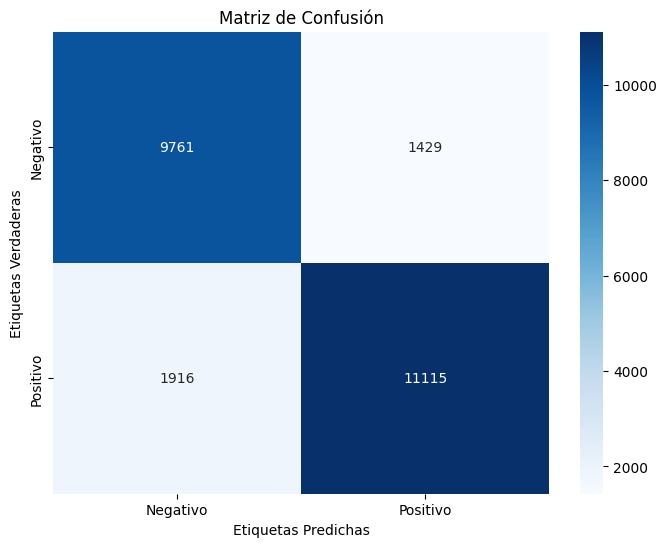

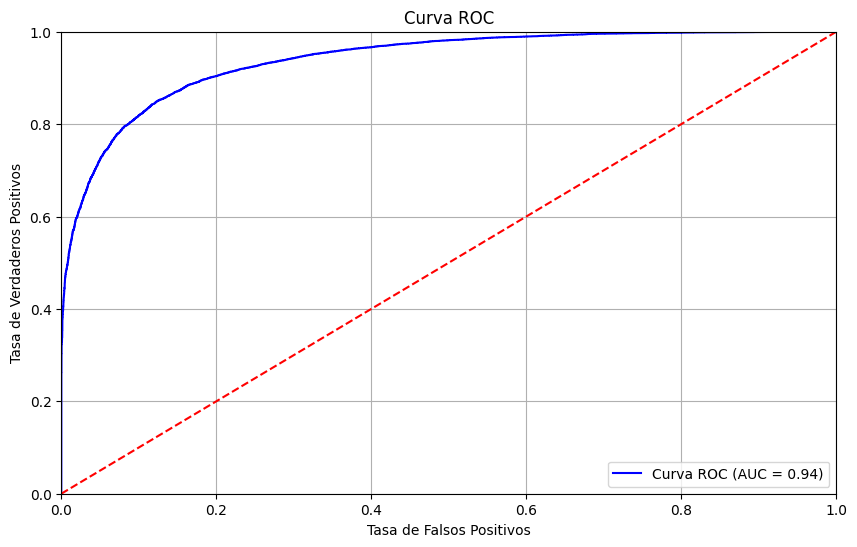

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Obtener las predicciones en el conjunto de test
predictions = model.predict(X_test_def)

# Para clasificación binaria, obtener las clases predichas
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Asumimos un umbral de 0.5

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicted_classes)

# Calcular métricas
report = classification_report(y_test, predicted_classes)

# Calcular el ROC AUC
roc_auc = roc_auc_score(y_test, predictions.flatten())  # Usar el array 1D de probabilidades

# Calcular FPR y TPR para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions.flatten())

# Imprimir resultados
print("Clasificación:")
print(report)
print(f"ROC AUC: {roc_auc:.2f}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Negativo', 'Positivo'],
             yticklabels=['Negativo', 'Positivo'])
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.title('Matriz de Confusión')
plt.show()

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [ ]:
model.save('/content/drive/MyDrive/CNNLSTM01102024_2.keras')

In [ ]:
model.save('/content/drive/MyDrive/CNNLSTM01102024_2.h5')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 25, 400)             │      18,395,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 25, 256)             │         307,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,943,445 (79.89 MB)

 Trainable params: 849,281 (3.24 MB)

 Non-trainable params: 18,395,600 (70.17 MB)

 Optimizer params: 1,698,564 (6.48 MB)

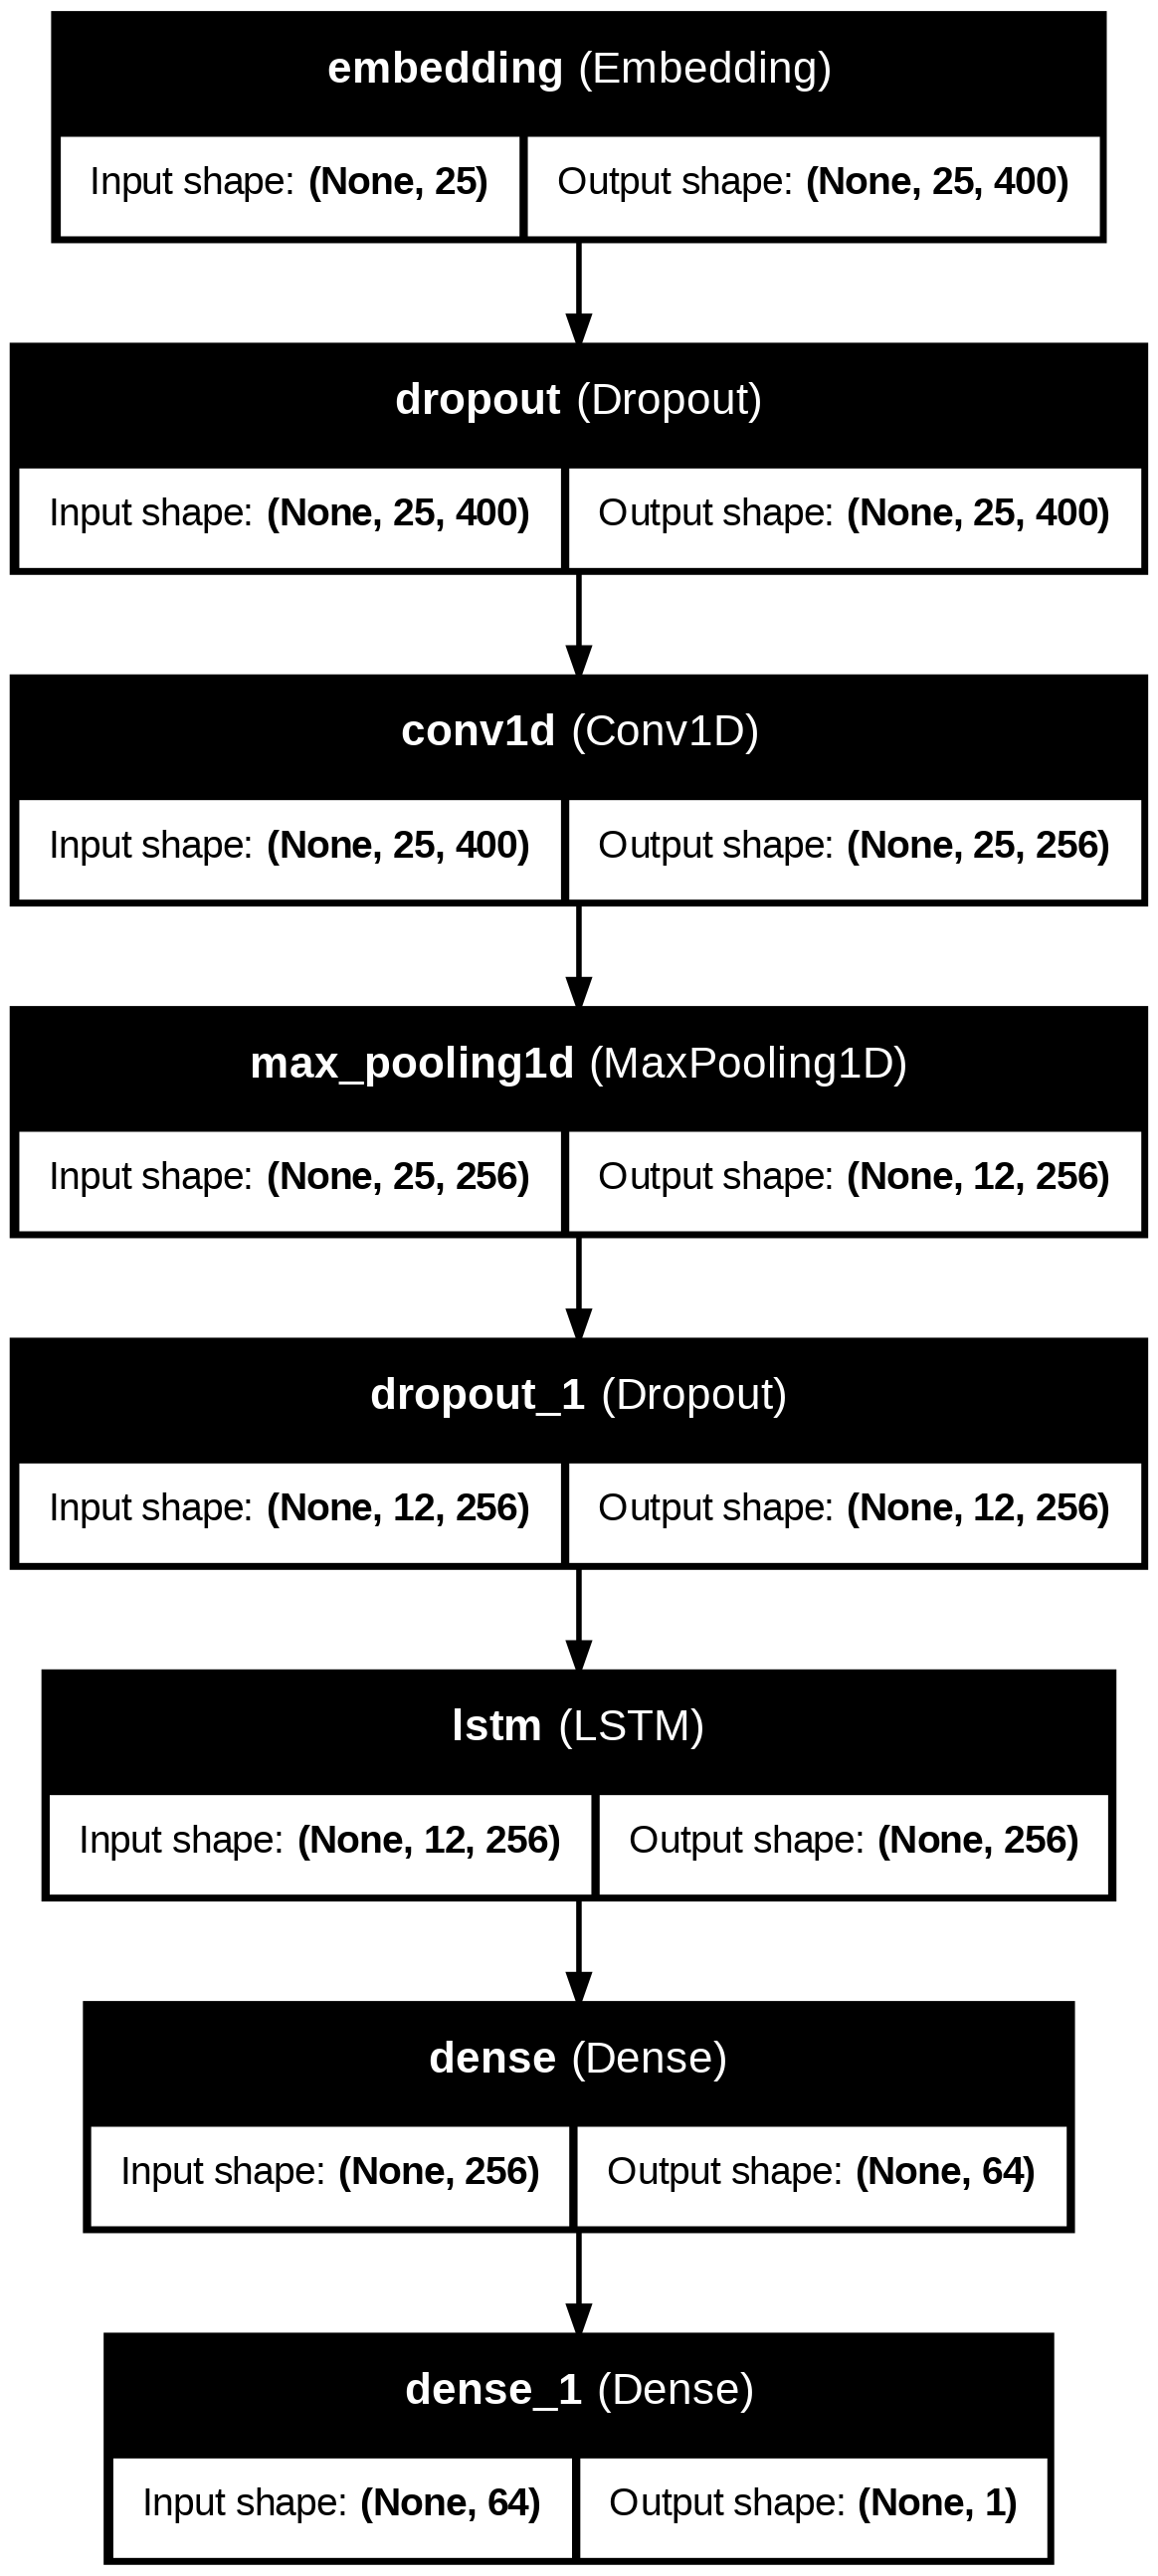

In [ ]:
!pip install pydot graphviz
from keras.utils import plot_model

# Supongamos que tu modelo se llama 'model'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
ls /content/drive/MyDrive

 CNNLSTM01102024_2.h5      embeddings_matrix_vader_sinlematizar_def.npy
 CNNLSTM01102024_2.keras   embeddings_matrix_validation.npy
 CNN_LSTM_val_def.ipynb    LSTM01102024.keras
'Colab Notebooks'/         sentiment140_vader4_sinlematizar.csv


757/757 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Clasificación:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     11190
           1       0.87      0.87      0.87     13031

    accuracy                           0.86     24221
   macro avg       0.86      0.86      0.86     24221
weighted avg       0.86      0.86      0.86     24221

ROC AUC: 0.94


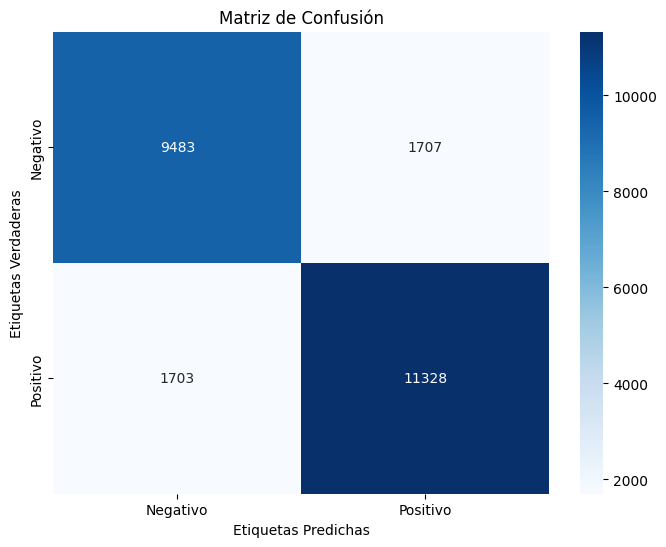

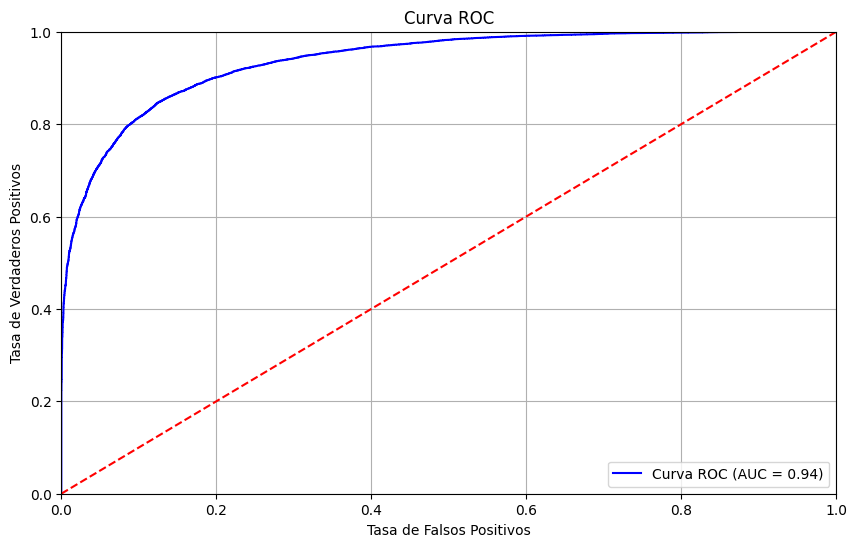

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Cargar el modelo
model = load_model('/content/drive/MyDrive/LSTM01102024.keras')


# Obtener las predicciones en el conjunto de test
predictions = model.predict(X_test_def)

# Para clasificación binaria, obtener las clases predichas
predicted_classes = (predictions > 0.5).astype("int32").flatten()  # Asumimos un umbral de 0.5

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicted_classes)

# Calcular métricas
report = classification_report(y_test, predicted_classes)

# Calcular el ROC AUC
roc_auc = roc_auc_score(y_test, predictions.flatten())  # Usar el array 1D de probabilidades

# Calcular FPR y TPR para la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, predictions.flatten())

# Imprimir resultados
print("Clasificación:")
print(report)
print(f"ROC AUC: {roc_auc:.2f}")

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Negativo', 'Positivo'],
             yticklabels=['Negativo', 'Positivo'])
plt.ylabel('Etiquetas Verdaderas')
plt.xlabel('Etiquetas Predichas')
plt.title('Matriz de Confusión')
plt.show()

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ (None, 25, 400)             │      18,395,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 25, 400)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 64)                  │         119,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,765,397 (71.58 MB)

 Trainable params: 123,265 (481.50 KB)

 Non-trainable params: 18,395,600 (70.17 MB)

 Optimizer params: 246,532 (963.02 KB)

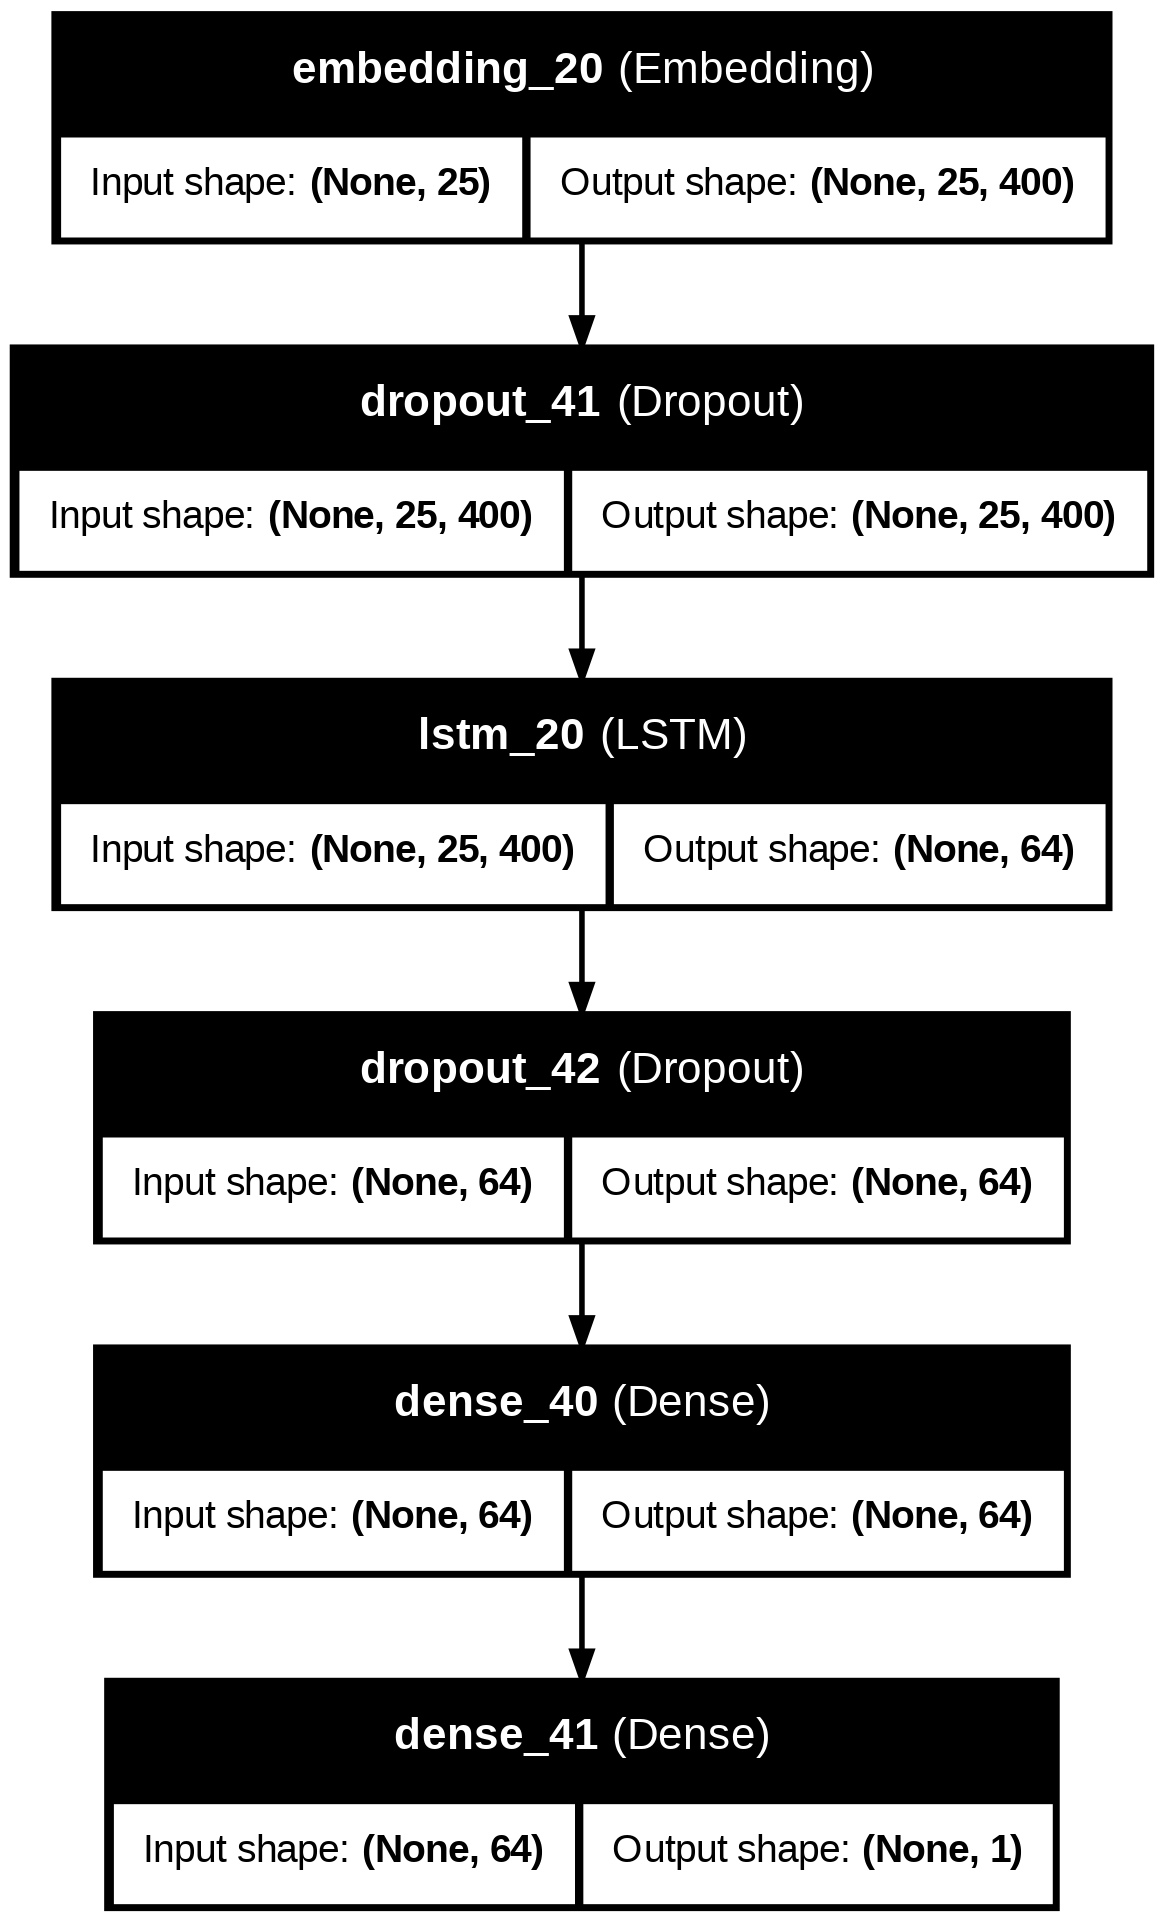

In [ ]:
!pip install pydot graphviz
from keras.utils import plot_model

# Supongamos que tu modelo se llama 'model'
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

model.add(LSTM(256))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7374 - loss: 0.5056 - val_accuracy: 0.8309 - val_loss: 0.3784
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8200 - loss: 0.3891 - val_accuracy: 0.8421 - val_loss: 0.3549
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8329 - loss: 0.3654 - val_accuracy: 0.8465 - val_loss: 0.3410
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8410 - loss: 0.3515 - val_accuracy: 0.8496 - val_loss: 0.3378
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8477 - loss: 0.3414 - val_accuracy: 0.8534 - val_loss: 0.3322
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8523 - loss: 0.3308 - val_accuracy: 0.8528 - val_loss: 0.3328
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8559 - loss: 0.3241 - val_accuracy: 0.8538 - val_loss: 0.3291
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8601 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3258
Pérdida en el conjunto de test: 0.32918351888656616
Precisión en el conjunto de test: 0.8564881682395935


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(256))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7407 - loss: 0.5023 - val_accuracy: 0.8296 - val_loss: 0.3784
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8197 - loss: 0.3914 - val_accuracy: 0.8392 - val_loss: 0.3562
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8328 - loss: 0.3675 - val_accuracy: 0.8489 - val_loss: 0.3413
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8396 - loss: 0.3543 - val_accuracy: 0.8493 - val_loss: 0.3353
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8445 - loss: 0.3452 - val_accuracy: 0.8507 - val_loss: 0.3355
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8468 - loss: 0.3379 - val_accuracy: 0.8521 - val_loss: 0.3314
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8518 - loss: 0.3285 - val_accuracy: 0.8532 - val_loss: 0.3308
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8532 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3253
Pérdida en el conjunto de test: 0.32678499817848206
Precisión en el conjunto de test: 0.8601626753807068


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7460 - loss: 0.4980 - val_accuracy: 0.8259 - val_loss: 0.3796
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8182 - loss: 0.3922 - val_accuracy: 0.8335 - val_loss: 0.3642
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8321 - loss: 0.3677 - val_accuracy: 0.8415 - val_loss: 0.3544
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8388 - loss: 0.3543 - val_accuracy: 0.8463 - val_loss: 0.3463
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8474 - loss: 0.3420 - val_accuracy: 0.8464 - val_loss: 0.3446
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8505 - loss: 0.3328 - val_accuracy: 0.8495 - val_loss: 0.3435
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8563 - loss: 0.3233 - val_accuracy: 0.8520 - val_loss: 0.3402
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8607 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3345
Pérdida en el conjunto de test: 0.3366475999355316
Precisión en el conjunto de test: 0.8518227934837341


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(128))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7448 - loss: 0.4961 - val_accuracy: 0.8250 - val_loss: 0.3877
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8165 - loss: 0.3922 - val_accuracy: 0.8347 - val_loss: 0.3615
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8332 - loss: 0.3668 - val_accuracy: 0.8409 - val_loss: 0.3567
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8399 - loss: 0.3522 - val_accuracy: 0.8481 - val_loss: 0.3379
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8456 - loss: 0.3402 - val_accuracy: 0.8476 - val_loss: 0.3427
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8528 - loss: 0.3292 - val_accuracy: 0.8511 - val_loss: 0.3334
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8579 - loss: 0.3184 - val_accuracy: 0.8533 - val_loss: 0.3301
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8619 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8525 - loss: 0.3308
Pérdida en el conjunto de test: 0.3332234025001526
Precisión en el conjunto de test: 0.8528549671173096


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(256))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7426 - loss: 0.4987 - val_accuracy: 0.8245 - val_loss: 0.3865
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8192 - loss: 0.3951 - val_accuracy: 0.8388 - val_loss: 0.3602
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8313 - loss: 0.3699 - val_accuracy: 0.8439 - val_loss: 0.3514
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8393 - loss: 0.3577 - val_accuracy: 0.8501 - val_loss: 0.3392
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8455 - loss: 0.3422 - val_accuracy: 0.8485 - val_loss: 0.3420
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8517 - loss: 0.3300 - val_accuracy: 0.8494 - val_loss: 0.3328
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8558 - loss: 0.3255 - val_accuracy: 0.8490 - val_loss: 0.3410


In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8457 - loss: 0.3380
Pérdida en el conjunto de test: 0.3411179184913635
Precisión en el conjunto de test: 0.8459188342094421


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7493 - loss: 0.4923 - val_accuracy: 0.8217 - val_loss: 0.3858
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8226 - loss: 0.3841 - val_accuracy: 0.8423 - val_loss: 0.3511
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8397 - loss: 0.3553 - val_accuracy: 0.8441 - val_loss: 0.3537
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8486 - loss: 0.3371 - val_accuracy: 0.8500 - val_loss: 0.3355
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8564 - loss: 0.3191 - val_accuracy: 0.8526 - val_loss: 0.3379
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8644 - loss: 0.3072 - val_accuracy: 0.8509 - val_loss: 0.3523
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8699 - loss: 0.2966 - val_accuracy: 0.8564 - val_loss: 0.3308
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8751 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3325
Pérdida en el conjunto de test: 0.33515840768814087
Precisión en el conjunto de test: 0.8537219762802124


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7560 - loss: 0.4838 - val_accuracy: 0.8312 - val_loss: 0.3677
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8255 - loss: 0.3774 - val_accuracy: 0.8414 - val_loss: 0.3582
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8448 - loss: 0.3431 - val_accuracy: 0.8409 - val_loss: 0.3703
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8567 - loss: 0.3225 - val_accuracy: 0.8463 - val_loss: 0.3535
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8655 - loss: 0.3030 - val_accuracy: 0.8538 - val_loss: 0.3461
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8761 - loss: 0.2850 - val_accuracy: 0.8573 - val_loss: 0.3471
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8836 - loss: 0.2689 - val_accuracy: 0.8570 - val_loss: 0.3581
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8882 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3707
Pérdida en el conjunto de test: 0.37398502230644226
Precisión en el conjunto de test: 0.8551257252693176


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7493 - loss: 0.4923 - val_accuracy: 0.8217 - val_loss: 0.3858
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8226 - loss: 0.3841 - val_accuracy: 0.8423 - val_loss: 0.3511
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8397 - loss: 0.3553 - val_accuracy: 0.8441 - val_loss: 0.3537
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8486 - loss: 0.3371 - val_accuracy: 0.8500 - val_loss: 0.3355
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8564 - loss: 0.3191 - val_accuracy: 0.8526 - val_loss: 0.3379
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8644 - loss: 0.3072 - val_accuracy: 0.8509 - val_loss: 0.3523
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8699 - loss: 0.2966 - val_accuracy: 0.8564 - val_loss: 0.3308
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8751 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8534 - loss: 0.3325
Pérdida en el conjunto de test: 0.33515840768814087
Precisión en el conjunto de test: 0.8537219762802124


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(128))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7508 - loss: 0.4901 - val_accuracy: 0.8309 - val_loss: 0.3720
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8234 - loss: 0.3843 - val_accuracy: 0.8431 - val_loss: 0.3503
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8401 - loss: 0.3533 - val_accuracy: 0.8462 - val_loss: 0.3445
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8477 - loss: 0.3372 - val_accuracy: 0.8519 - val_loss: 0.3429
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8547 - loss: 0.3219 - val_accuracy: 0.8536 - val_loss: 0.3323
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8636 - loss: 0.3087 - val_accuracy: 0.8544 - val_loss: 0.3485
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8685 - loss: 0.2955 - val_accuracy: 0.8551 - val_loss: 0.3318
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8748 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8540 - loss: 0.3460
Pérdida en el conjunto de test: 0.3497939109802246
Precisión en el conjunto de test: 0.8540935516357422


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=128, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(256))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7497 - loss: 0.4916 - val_accuracy: 0.8303 - val_loss: 0.3723
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8217 - loss: 0.3865 - val_accuracy: 0.8391 - val_loss: 0.3568
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8386 - loss: 0.3551 - val_accuracy: 0.8467 - val_loss: 0.3438
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8472 - loss: 0.3382 - val_accuracy: 0.8509 - val_loss: 0.3345
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8550 - loss: 0.3213 - val_accuracy: 0.8523 - val_loss: 0.3400
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8649 - loss: 0.3092 - val_accuracy: 0.8549 - val_loss: 0.3346
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8709 - loss: 0.2948 - val_accuracy: 0.8541 - val_loss: 0.3338
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8735 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8522 - loss: 0.3557
Pérdida en el conjunto de test: 0.35832980275154114
Precisión en el conjunto de test: 0.8524007797241211


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7560 - loss: 0.4838 - val_accuracy: 0.8312 - val_loss: 0.3677
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8255 - loss: 0.3774 - val_accuracy: 0.8414 - val_loss: 0.3582
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8448 - loss: 0.3431 - val_accuracy: 0.8409 - val_loss: 0.3703
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8567 - loss: 0.3225 - val_accuracy: 0.8463 - val_loss: 0.3535
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8655 - loss: 0.3030 - val_accuracy: 0.8538 - val_loss: 0.3461
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8761 - loss: 0.2850 - val_accuracy: 0.8573 - val_loss: 0.3471
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8836 - loss: 0.2689 - val_accuracy: 0.8570 - val_loss: 0.3581
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8882 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3707
Pérdida en el conjunto de test: 0.37398502230644226
Precisión en el conjunto de test: 0.8551257252693176


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(128))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7562 - loss: 0.4815 - val_accuracy: 0.8314 - val_loss: 0.3667
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8282 - loss: 0.3734 - val_accuracy: 0.8412 - val_loss: 0.3530
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8481 - loss: 0.3402 - val_accuracy: 0.8443 - val_loss: 0.3588
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8564 - loss: 0.3212 - val_accuracy: 0.8512 - val_loss: 0.3390
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8689 - loss: 0.3009 - val_accuracy: 0.8519 - val_loss: 0.3760
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8746 - loss: 0.2847 - val_accuracy: 0.8570 - val_loss: 0.3382
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8841 - loss: 0.2695 - val_accuracy: 0.8533 - val_loss: 0.3570
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8884 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3394
Pérdida en el conjunto de test: 0.33987829089164734
Precisión en el conjunto de test: 0.8570249080657959


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(128))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7562 - loss: 0.4815 - val_accuracy: 0.8314 - val_loss: 0.3667
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8282 - loss: 0.3734 - val_accuracy: 0.8412 - val_loss: 0.3530
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8481 - loss: 0.3402 - val_accuracy: 0.8443 - val_loss: 0.3588
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8564 - loss: 0.3212 - val_accuracy: 0.8512 - val_loss: 0.3390
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8689 - loss: 0.3009 - val_accuracy: 0.8519 - val_loss: 0.3760
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.8746 - loss: 0.2847 - val_accuracy: 0.8570 - val_loss: 0.3382
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8841 - loss: 0.2695 - val_accuracy: 0.8533 - val_loss: 0.3570
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.8884 - loss

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8555 - loss: 0.3394
Pérdida en el conjunto de test: 0.33987829089164734
Precisión en el conjunto de test: 0.8570249080657959


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(256))

model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7550 - loss: 0.4819 - val_accuracy: 0.8332 - val_loss: 0.3665
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 39s 8ms/step - accuracy: 0.8266 - loss: 0.3755 - val_accuracy: 0.8448 - val_loss: 0.3474
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8484 - loss: 0.3391 - val_accuracy: 0.8517 - val_loss: 0.3383
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8544 - loss: 0.3225 - val_accuracy: 0.8494 - val_loss: 0.3516
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8666 - loss: 0.2993 - val_accuracy: 0.8584 - val_loss: 0.3340
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8761 - loss: 0.2820 - val_accuracy: 0.8575 - val_loss: 0.3494
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8841 - loss: 0.2667 - val_accuracy: 0.8571 - val_loss: 0.3566
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8910 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8537 - loss: 0.3337
Pérdida en el conjunto de test: 0.3368162214756012
Precisión en el conjunto de test: 0.8536806702613831


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7441 - loss: 0.4968 - val_accuracy: 0.8332 - val_loss: 0.3694
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8273 - loss: 0.3745 - val_accuracy: 0.8473 - val_loss: 0.3559
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8439 - loss: 0.3451 - val_accuracy: 0.8531 - val_loss: 0.3368
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.8526 - loss: 0.3290 - val_accuracy: 0.8558 - val_loss: 0.3356
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.8604 - loss: 0.3145 - val_accuracy: 0.8569 - val_loss: 0.3286
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8675 - loss: 0.3023 - val_accuracy: 0.8566 - val_loss: 0.3306
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8724 - loss: 0.2916 - val_accuracy: 0.8575 - val_loss: 0.3280
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8762 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8596 - loss: 0.3299
Pérdida en el conjunto de test: 0.33522316813468933
Precisión en el conjunto de test: 0.8606168031692505


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7521 - loss: 0.4895 - val_accuracy: 0.8340 - val_loss: 0.3638
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.8303 - loss: 0.3703 - val_accuracy: 0.8465 - val_loss: 0.3495
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8452 - loss: 0.3422 - val_accuracy: 0.8535 - val_loss: 0.3346
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 40s 10ms/step - accuracy: 0.8544 - loss: 0.3255 - val_accuracy: 0.8571 - val_loss: 0.3289
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.8617 - loss: 0.3100 - val_accuracy: 0.8602 - val_loss: 0.3200
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8692 - loss: 0.2988 - val_accuracy: 0.8561 - val_loss: 0.3265
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8732 - loss: 0.2916 - val_accuracy: 0.8575 - val_loss: 0.3369
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 10ms/step - accuracy: 0.8782 - loss

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3240
Pérdida en el conjunto de test: 0.3257320523262024
Precisión en el conjunto de test: 0.8575616478919983


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)

model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))


model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))


model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)



# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.7463 - loss: 0.4926 - val_accuracy: 0.8374 - val_loss: 0.3619
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 37s 9ms/step - accuracy: 0.8307 - loss: 0.3730 - val_accuracy: 0.8456 - val_loss: 0.3540
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 43s 9ms/step - accuracy: 0.8442 - loss: 0.3442 - val_accuracy: 0.8518 - val_loss: 0.3353
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8538 - loss: 0.3287 - val_accuracy: 0.8547 - val_loss: 0.3276
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8619 - loss: 0.3129 - val_accuracy: 0.8564 - val_loss: 0.3360
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8662 - loss: 0.3037 - val_accuracy: 0.8569 - val_loss: 0.3250
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 41s 9ms/step - accuracy: 0.8723 - loss: 0.2907 - val_accuracy: 0.8592 - val_loss: 0.3284
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 42s 9ms/step - accuracy: 0.8772 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8598 - loss: 0.3463
Pérdida en el conjunto de test: 0.34743592143058777
Precisión en el conjunto de test: 0.8607819676399231


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))


model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7556 - loss: 0.4809 - val_accuracy: 0.8382 - val_loss: 0.3605
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8350 - loss: 0.3597 - val_accuracy: 0.8470 - val_loss: 0.3462
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8532 - loss: 0.3265 - val_accuracy: 0.8522 - val_loss: 0.3401
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8629 - loss: 0.3051 - val_accuracy: 0.8525 - val_loss: 0.3414
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8737 - loss: 0.2885 - val_accuracy: 0.8524 - val_loss: 0.3508
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8800 - loss: 0.2754 - val_accuracy: 0.8515 - val_loss: 0.3520
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8853 - loss: 0.2627 - val_accuracy: 0.8486 - val_loss: 0.3529


In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8530 - loss: 0.3413
Pérdida en el conjunto de test: 0.34199532866477966
Precisión en el conjunto de test: 0.8523595333099365


FILTRO 64 con dropout 0.3

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(128))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.7491 - loss: 0.4890 - val_accuracy: 0.8339 - val_loss: 0.3696
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8272 - loss: 0.3761 - val_accuracy: 0.8444 - val_loss: 0.3561
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - accuracy: 0.8443 - loss: 0.3473 - val_accuracy: 0.8501 - val_loss: 0.3366
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 0.8499 - loss: 0.3329 - val_accuracy: 0.8550 - val_loss: 0.3270
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8544 - loss: 0.3220 - val_accuracy: 0.8520 - val_loss: 0.3338
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.8600 - loss: 0.3144 - val_accuracy: 0.8564 - val_loss: 0.3249
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 32s 7ms/step - accuracy: 0.8640 - loss: 0.3060 - val_accuracy: 0.8557 - val_loss: 0.3257
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8680 - lo

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8554 - loss: 0.3336
Pérdida en el conjunto de test: 0.3363182246685028
Precisión en el conjunto de test: 0.8557863235473633


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7503 - loss: 0.4906 - val_accuracy: 0.8345 - val_loss: 0.3715
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8258 - loss: 0.3789 - val_accuracy: 0.8432 - val_loss: 0.3500
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8427 - loss: 0.3489 - val_accuracy: 0.8474 - val_loss: 0.3404
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8492 - loss: 0.3338 - val_accuracy: 0.8511 - val_loss: 0.3324
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8559 - loss: 0.3223 - val_accuracy: 0.8556 - val_loss: 0.3317
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8633 - loss: 0.3117 - val_accuracy: 0.8551 - val_loss: 0.3291
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8653 - loss: 0.3058 - val_accuracy: 0.8540 - val_loss: 0.3339
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8697 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.3300
Pérdida en el conjunto de test: 0.3313954174518585
Precisión en el conjunto de test: 0.8536806702613831


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7521 - loss: 0.4874 - val_accuracy: 0.8265 - val_loss: 0.3773
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8260 - loss: 0.3775 - val_accuracy: 0.8346 - val_loss: 0.3667
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8448 - loss: 0.3467 - val_accuracy: 0.8430 - val_loss: 0.3505
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8542 - loss: 0.3299 - val_accuracy: 0.8470 - val_loss: 0.3402
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8624 - loss: 0.3142 - val_accuracy: 0.8477 - val_loss: 0.3544
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8689 - loss: 0.3001 - val_accuracy: 0.8505 - val_loss: 0.3364
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8747 - loss: 0.2892 - val_accuracy: 0.8509 - val_loss: 0.3530
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8772 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8507 - loss: 0.3412
Pérdida en el conjunto de test: 0.34410977363586426
Precisión en el conjunto de test: 0.8507080674171448


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(128))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 38s 13ms/step - accuracy: 0.7545 - loss: 0.4858 - val_accuracy: 0.8300 - val_loss: 0.3746
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.8267 - loss: 0.3773 - val_accuracy: 0.8341 - val_loss: 0.3634
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 33s 7ms/step - accuracy: 0.8447 - loss: 0.3462 - val_accuracy: 0.8462 - val_loss: 0.3540
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8540 - loss: 0.3284 - val_accuracy: 0.8500 - val_loss: 0.3373
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8615 - loss: 0.3111 - val_accuracy: 0.8520 - val_loss: 0.3416
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.8673 - loss: 0.3007 - val_accuracy: 0.8492 - val_loss: 0.3464
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8747 - loss: 0.2852 - val_accuracy: 0.8514 - val_loss: 0.3429
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 28s 12ms/step - accuracy: 0.8791 - los

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3537
Pérdida en el conjunto de test: 0.35677582025527954
Precisión en el conjunto de test: 0.8527311086654663


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(256))


model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7521 - loss: 0.4878 - val_accuracy: 0.8311 - val_loss: 0.3817
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8266 - loss: 0.3789 - val_accuracy: 0.8389 - val_loss: 0.3563
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8434 - loss: 0.3469 - val_accuracy: 0.8431 - val_loss: 0.3578
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8519 - loss: 0.3304 - val_accuracy: 0.8479 - val_loss: 0.3422
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8599 - loss: 0.3150 - val_accuracy: 0.8509 - val_loss: 0.3448
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8685 - loss: 0.2995 - val_accuracy: 0.8487 - val_loss: 0.3367
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8740 - loss: 0.2863 - val_accuracy: 0.8522 - val_loss: 0.3494
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.8792 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8521 - loss: 0.3647
Pérdida en el conjunto de test: 0.3677906394004822
Precisión en el conjunto de test: 0.85211181640625


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))



model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 62s 9ms/step - accuracy: 0.7555 - loss: 0.4839 - val_accuracy: 0.8365 - val_loss: 0.3643
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 48s 12ms/step - accuracy: 0.8314 - loss: 0.3669 - val_accuracy: 0.8450 - val_loss: 0.3453
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - accuracy: 0.8495 - loss: 0.3340 - val_accuracy: 0.8514 - val_loss: 0.3393
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8584 - loss: 0.3178 - val_accuracy: 0.8572 - val_loss: 0.3297
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8658 - loss: 0.3011 - val_accuracy: 0.8576 - val_loss: 0.3313
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8745 - loss: 0.2873 - val_accuracy: 0.8584 - val_loss: 0.3321
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8784 - loss: 0.2778 - val_accuracy: 0.8526 - val_loss: 0.3500
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8839 - loss: 

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8571 - loss: 0.3302
Pérdida en el conjunto de test: 0.33100593090057373
Precisión en el conjunto de test: 0.8584286570549011


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(128))



model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 35s 13ms/step - accuracy: 0.7574 - loss: 0.4798 - val_accuracy: 0.8416 - val_loss: 0.3586
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - accuracy: 0.8335 - loss: 0.3655 - val_accuracy: 0.8461 - val_loss: 0.3433
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.8490 - loss: 0.3346 - val_accuracy: 0.8532 - val_loss: 0.3320
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8590 - loss: 0.3144 - val_accuracy: 0.8549 - val_loss: 0.3267
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8654 - loss: 0.3025 - val_accuracy: 0.8564 - val_loss: 0.3360
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8735 - loss: 0.2894 - val_accuracy: 0.8588 - val_loss: 0.3315
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8796 - loss: 0.2778 - val_accuracy: 0.8539 - val_loss: 0.3443
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8838 - loss

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8552 - loss: 0.3314
Pérdida en el conjunto de test: 0.3346591889858246
Precisión en el conjunto de test: 0.8569422960281372


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(64))



model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.7627 - loss: 0.4728 - val_accuracy: 0.8364 - val_loss: 0.3650
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.8371 - loss: 0.3578 - val_accuracy: 0.8503 - val_loss: 0.3424
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 26s 11ms/step - accuracy: 0.8582 - loss: 0.3205 - val_accuracy: 0.8563 - val_loss: 0.3407
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.8677 - loss: 0.3001 - val_accuracy: 0.8590 - val_loss: 0.3426
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 34s 7ms/step - accuracy: 0.8777 - loss: 0.2808 - val_accuracy: 0.8597 - val_loss: 0.3436
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8873 - loss: 0.2629 - val_accuracy: 0.8584 - val_loss: 0.3499
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8922 - loss: 0.2480 - val_accuracy: 0.8560 - val_loss: 0.3554
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8989 - los

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8557 - loss: 0.3474
Pérdida en el conjunto de test: 0.34889844059944153
Precisión en el conjunto de test: 0.8568597435951233


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# Parámetros
max_len = X_train_def.shape[1]


model = Sequential()
seed=42
np.random.seed(seed)
random.seed(seed)
tf.random.set_seed(seed)
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix_x_train], trainable=False, input_length=max_len))
model.add(Dropout(0.25))

model.add(Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(LSTM(256))



model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Reducir el learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy']) # Función de pérdida binaria

# Definir Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)


# Entrenamiento con Early Stopping usando conjuntos de validación específicos
history = model.fit(
    X_train_def, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val_def, y_val),  # Especifica los conjuntos de validación
    callbacks=[early_stopping]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7627 - loss: 0.4706 - val_accuracy: 0.8417 - val_loss: 0.3531
Epoch 2/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.8391 - loss: 0.3547 - val_accuracy: 0.8528 - val_loss: 0.3331
Epoch 3/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.8576 - loss: 0.3201 - val_accuracy: 0.8562 - val_loss: 0.3348
Epoch 4/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8672 - loss: 0.3002 - val_accuracy: 0.8554 - val_loss: 0.3490
Epoch 5/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8765 - loss: 0.2819 - val_accuracy: 0.8576 - val_loss: 0.3273
Epoch 6/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8871 - loss: 0.2624 - val_accuracy: 0.8575 - val_loss: 0.3399
Epoch 7/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8911 - loss: 0.2499 - val_accuracy: 0.8578 - val_loss: 0.3649
Epoch 8/20
2423/2423 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8990 - loss: 0

In [ ]:
# Convertir X_test a secuencias numéricas
sequences_test = tokenizer.texts_to_sequences(X_test.astype(str))  # Convertir a secuencias
X_test_def = pad_sequences(sequences_test, maxlen=max_length, padding='post')  # Asegurarse de que tengan la misma longitud que max_len

# Evaluación en el conjunto de test
test_loss, test_accuracy = model.evaluate(X_test_def, y_test, batch_size=64)

print(f"Pérdida en el conjunto de test: {test_loss}")
print(f"Precisión en el conjunto de test: {test_accuracy}")

379/379 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.3711
Pérdida en el conjunto de test: 0.37128007411956787
Precisión en el conjunto de test: 0.8562817573547363
